<a href="https://colab.research.google.com/github/bhoomikaagrawal16/Compute-tasks/blob/main/Task%206/%20Bagging_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/churndata_processed.csv')
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


Understanding the Imbalance in the Dataset

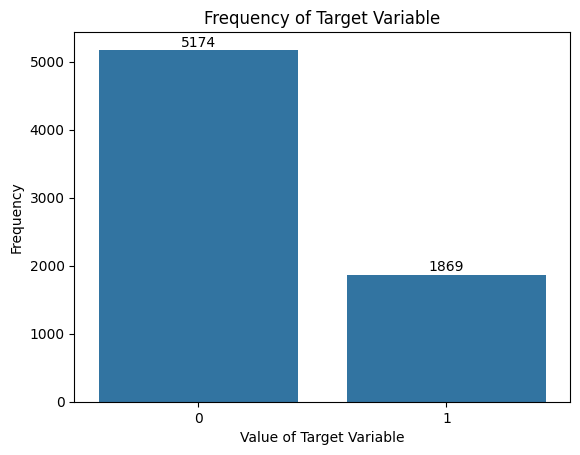

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the imbalance in the target variable
sns.countplot(x='churn_value', data=df)
plt.title('Frequency of Target Variable')
plt.xlabel('Value of Target Variable')
plt.ylabel('Frequency')

# Annotate the plot with the count for each class
counts = df['churn_value'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center')

plt.show()

Imbalanced Dataset Treatment

In [4]:
from sklearn.utils import resample

df_majority = df[df['churn_value'] == 0]
df_minority = df[df['churn_value'] == 1]
df_sampled = resample(df_minority, replace=True, n_samples=5174, random_state=50)

df1 = pd.concat([df_sampled, df_majority])

Splitting the Dataset

In [5]:
from sklearn.model_selection import train_test_split

x = df1.drop(['churn_value'], axis=1).values
y = df1['churn_value'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

Bagging (Random Forest) Implementation

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
estimator_range = np.arange(5, 50, 1)
model = []
score = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=69)
    clf.fit(x_train, y_train)

    # Append the model and score to their respective list
    model.append(clf)
    score.append(f1_score(y_true=y_test, y_pred=clf.predict(x_test)))

max(score)

0.9761124121779859

Metric Focus:
For an imbalanced dataset, we should focus on metrics that are not affected by class imbalance, such as F1-score, precision, recall, or ROC-AUC. These metrics give a better understanding of the model's performance, especially when the classes are imbalanced, as they consider both the positive and negative classes. Accuracy, on the other hand, can be misleading in this context as it can be high even if the model is not performing well on the minority class.